In [3]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import geopandas as gpd
from shapely import wkt
import matplotlib.pyplot as plt
from geodatasets import get_path
import numpy as np

/var/folders/cv/s_h5gzxd0h71t_d875wqxgzh0000gn/T/ipykernel_25374/3421372695.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [4]:
gpd.datasets.available

['naturalearth_cities', 'naturalearth_lowres', 'nybb']

In [5]:
In [1]: world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

/var/folders/cv/s_h5gzxd0h71t_d875wqxgzh0000gn/T/ipykernel_25374/3683481744.py:1: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


In [6]:
path_frontal_ablation_per_glacier = "/Users/annek/Library/CloudStorage/OneDrive-SharedLibraries-NIOZ/PhD Anneke Vries - General/freshwaterII/data/raw/solid_discharge/Kochtitzky2023/CCIN13272_20220623_Greenland_frontal_ablation_by_glacier_Kochtitzky_et_al_v2.csv"

In [7]:
# Open the file in read mode ('r')
with open(path_frontal_ablation_per_glacier, 'r', encoding='ISO-8859-1') as file:
    # Read the contents of the file
    metadata = file.read()

print(metadata)


Data table prepared by William Kochtitzky,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
"June, 2022",,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
"For questions or clarification, please contact William Kochtitzky at will.kochtitzky@uottawa.ca or willkochtitzky@gmail.com (long term address)",,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
For periphery glaciers we use the RGI 6 naming conventions. For ice sheet outlets we use Mouginot and Rignot (2019) ,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
"Glaciers that have multiple termini but only one RGI_Id number were subdivided by adding _X to the end of the RGI_Id, for example: RGI60-05.04515_2",,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Latitude and longitude are given for each glacier in the WGS84 projection (EPSG: 4326),,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Climatic mass balances that are negative indicate the glacier advanced (so negative number reduces the frontal ablation contribution) while positive numbers indicate retreat (also reducin

In [8]:
dtypesFloat = ['2000_2010_mean_velocity',
       '2000_2010_mean_velocity_error', '2010_2020_mean_velocity',
       '2010_2020_mean_velocity_error', 'best_thickness_early',
       'best_thickness_early_err', 'best_thickness_late',
       'best_thickness_late_err', 
       'FA_not_calculated_in_normal_way_early',
       'FA_not_calculated_in_normal_way_late',
       'net_area_change_km2_per_year_early',
       'net_area_change_km2_per_year_early_error',
       'net_area_change_km2_per_year_late',
       'net_area_change_km2_per_year_late_error',
       'melt_correct_gt_early_terminus_change',
       'melt_correct_gt_early_err_terminus_change',
       'melt_correct_gt_late_terminus_change',
       'melt_correct_gt_late_err_terminus_change',
       'melt_correct_gt_early_discharge',
       'melt_correct_gt_early_err_discharge',
       'melt_correct_gt_late_discharge',
       'melt_correct_gt_late_err_discharge',
       'terminus_gt_change_per_year_early',
       'terminus_gt_change_per_year_early_area_error',
       'terminus_gt_change_per_year_late',
       'terminus_gt_change_per_year_late_area_error',
       '2000_2010_mean_discharge_gt_per_year',
       '2000_2010_mean_flux_err_gt',
       '2010_2020_mean_discharge_gt_per_year',
       '2010_2020_mean_flux_err_gt',
       'Frontal_ablation_2000_to_2010_gt_per_yr_mean',
       'Frontal_ablation_2000_to_2010_gt_per_yr_mean_err',
       'Frontal_ablation_2010_to_2020_gt_per_yr_mean',
       'Frontal_ablation_2010_to_2020_gt_per_yr_mean_err', ]

In [9]:
try:
    dfKoch = pd.read_csv(path_frontal_ablation_per_glacier, sep =',')
except UnicodeDecodeError:
    dfKoch = pd.read_csv(path_frontal_ablation_per_glacier, sep =',', encoding='ISO-8859-1', header=13)

dictKoch =dfKoch.iloc[0].to_dict()
dfKoch = dfKoch.iloc[1:]
dfKoch[dtypesFloat] = dfKoch[dtypesFloat].astype(float)
dfKoch['geometry'] = dfKoch['geometry'].apply(wkt.loads)
dfKoch['Name'] = dfKoch['Name'].astype(str)
dfKoch['geometry_glaciers'] = dfKoch['geometry']
gdfKoch = gpd.GeoDataFrame(dfKoch, crs='epsg:3995')
gdfKoch = gpd.GeoDataFrame(dfKoch, geometry=gpd.points_from_xy(dfKoch.lon, dfKoch.lat), crs='epsg:4326')




<Axes: >

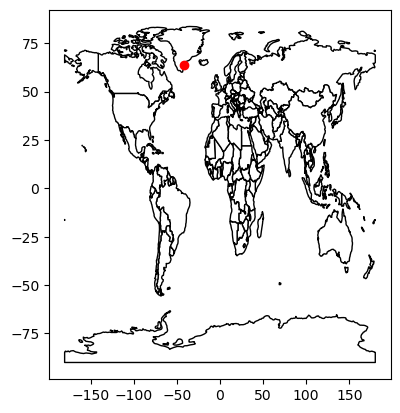

In [10]:
NameGlacier = 'JAKOBSHAVN_ISBRAE'
gdfGlacier = gdfKoch[gdfKoch['Name']==NameGlacier]

gdfGlacier = gdfGlacier.to_crs(epsg=4326)

# Change the CRS of the GeoDataFrame to the Polar Stereographic projection


# Now plot the GeoDataFrame
ax = world.plot(color="white", edgecolor="black")

gdfGlacier.plot(ax=ax, color="red")



In [42]:
gdfKoch = gdfKoch.to_crs(epsg=4326)
gdfKoch.geometry

1      POINT (-22.47331 76.95434)
2      POINT (-32.42428 81.59166)
3      POINT (-25.87022 73.94856)
4      POINT (-49.48599 64.37456)
5      POINT (-55.98208 74.60807)
                  ...            
746    POINT (-29.14185 70.37831)
747    POINT (-24.25368 73.83875)
748    POINT (-64.09468 76.35979)
749    POINT (-64.34380 76.36442)
750    POINT (-21.10231 78.91860)
Name: geometry, Length: 750, dtype: geometry

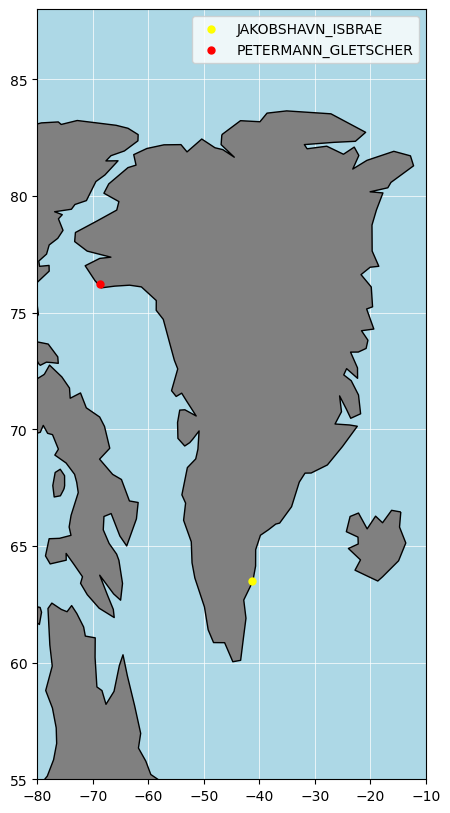

In [43]:
base = world.plot(color='grey', edgecolor='black')
# add gridlines
base.set_axisbelow(True)
base.grid(color='white', linestyle='-', linewidth=0.5)
# gdfKoch.plot(ax=base, marker='o', color='red', markersize=5)

# set extent of the map
base.set_xlim(-80, -10)
base.set_ylim(55, 88)
# make the figure  bigger to see more details
base.set_facecolor('lightblue')
fig = base.get_figure()
fig.set_size_inches(10, 10)
# plot every 10th as black

# plot gdfGlacier
gdfGlacier.plot(ax=base, marker='o', markersize=25, color='yellow', label=gdfGlacier['Name'].iloc[0])
NameGlacier = 'PETERMANN_GLETSCHER'
gdfKoch[gdfKoch['Name']==NameGlacier].plot(ax=base, marker='o', markersize=25,  label=NameGlacier, color='red')


plt.legend()

NameGlacier = 'PETERMANN_GLETSCHER'
def plot_map(NameGlacier):
    ''' plot the map with  glaciers and the location of the glacier'''
    base = world.plot(color='grey', edgecolor='black')
# add gridlines
    base.set_axisbelow(True)
    base.grid(color='white', linestyle='-', linewidth=0.5)
# set extent of the map
    base.set_xlim(-80, -10)
    base.set_ylim(55, 88)
# make the figure  bigger to see more details
    base.set_facecolor('lightblue')
    fig = base.get_figure()
    fig.set_size_inches(10, 10)
# plot every 10th as black

    gdfKoch[gdfKoch['Name']==NameGlacier].plot(ax=base, marker='o', markersize=25,  label=NameGlacier, color='red')
    plt.legend()



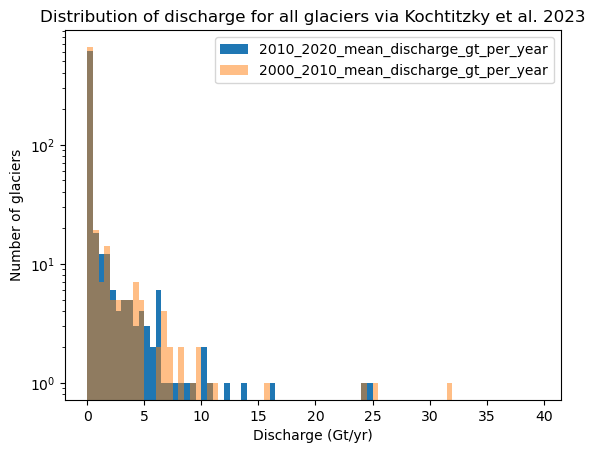

In [59]:
dfKoch['2010_2020_mean_discharge_gt_per_year'].plot.hist(bins=np.arange(0,40, 0.5), label = '2010_2020_mean_discharge_gt_per_year')
# make transparent color
dfKoch['2000_2010_mean_discharge_gt_per_year'].plot.hist(bins=np.arange(0,40, 0.5), alpha=0.5, label = '2000_2010_mean_discharge_gt_per_year')
# make y axis log
plt.yscale('log')
plt.xlabel('Discharge (Gt/yr)')
plt.ylabel('Number of glaciers')
plt.title('Distribution of discharge for all glaciers via Kochtitzky et al. 2023')
plt.legend()

Text(0, 0.5, 'Glacier name')

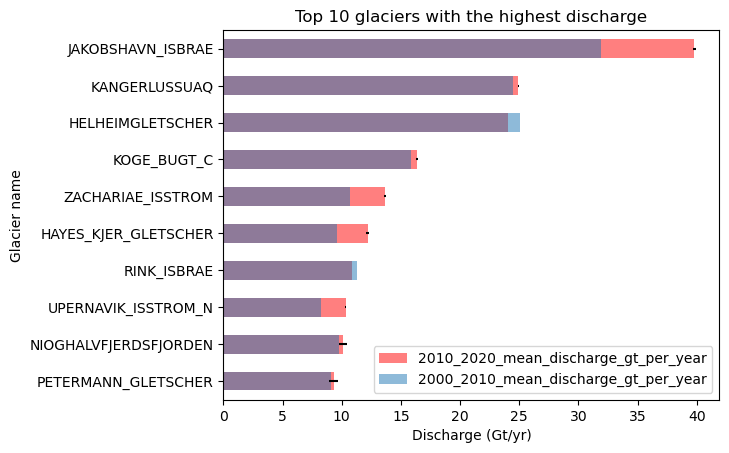

In [73]:
# find the10 glaciers with the highest discharge

top10 = dfKoch.sort_values(by='2010_2020_mean_discharge_gt_per_year', ascending=False).iloc[:10].sort_values(by='2010_2020_mean_discharge_gt_per_year', ascending=True)
# make a horizontal bar plot
fig, ax = plt.subplots()
top10.plot.barh(x='Name', y='2010_2020_mean_discharge_gt_per_year', ax=ax, alpha=0.5, color = 'red')
top10.plot.barh(x='Name', y='2000_2010_mean_discharge_gt_per_year', alpha=0.5, ax=ax)
plt.title('Top 10 glaciers with the highest discharge')
ax.errorbar(x=top10['2010_2020_mean_discharge_gt_per_year'], y=top10['Name'], xerr=top10['2010_2020_mean_flux_err_gt'], color='black', fmt="None")
plt.xlabel('Discharge (Gt/yr)')
plt.ylabel('Glacier name')
